# House Price Prediction - Data Preprocessing
This notebook documents the preprocessing steps applied to the housing dataset in preparation for building a predictive model.

---
Below is the interactive Table of Contents.  
Click any section to jump directly to it 👇

---

## 📑 Table of Contents
1. [Importing Libraries](Real_Estate_Price_Prediction.ipynb#importing-libraries)
2. [Loading the Dataset](#loading-the-dataset)
3. [Renaming Columns](#1-renaming-columns)
4. [Encoding Categorical Values](#2-encoding-categorical-values)
5. [Data Analysis & Visualization](#Data-Analysis-&-Visualization)
6. [Outlier Removal & Log Transformation — Price](#Outlier-Removal&Transformation--Price)
7. [Outlier Removal & Log Transformation — Area](#Outlier-Removal&Transformation--Area)
8. [Correlation Analysis](#Correlation-Analysis-Results)
9. [Boxplots by Property Type & Location](#boxplots-by-property-type-&-location)
10. [Aggregated Analysis by Property Type & Location](#Aggregated-Analysis-by-Property-Type-&-Location)
11. [Feature Engineering & Data Export](#Feature-Engineering-and-Data-Export)
12. [Train/Test Split](#Data-Preparation-&-Train/Test-Split)
13. [Target Encoding](#Target-Encoding)
14. [Feature Engineering Summary](#Feature-Engineering-Summary)
15. [Final Encoding for Test Set](#Final-Encoding-for-Test-Set)
16. [Saving Encoded Data](#Save-Encoded-Data-to-CSV)
17. [Features Summary](#Features-Summary)



## importing libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split, KFold
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

# loading the dataset


The dataset was loaded from Excel and the first few rows were inspected to understand the structure of the data.

In [2]:
file ="d:\\ready_hoses.xlsx" 
data = pd.read_excel(file,sheet_name="final_hose_redy")
data.head()

,id,price,type,number_of_beds,number_of_baths,area,location_2,location.3
0,1,9500000,شقة,3,2,140,مناطق أخرى,الجيزة
1,2,5800000,شقة,3,2,145,6 أكتوبر,الجيزة
2,3,15150000,فیلا,3,3,225,6 أكتوبر,الجيزة
3,4,11200000,شقة,3,2,150,6 أكتوبر,الجيزة
4,5,21918000,فیلا,4,4,265,التجمع الخامس,القاهرة الجديدة


## Data Preprocessing
###  1-renaming columns
Column names were standardized to English for consistency and easier processing.

In [3]:
# standradize names of columns
data.rename(columns={
    "location_2": "sub_location",
    "location.3": "location",
    "number_of_beds": "n_bedrooms",
    "number_of_baths": "n_bathrooms"
}, inplace=True)

data.head()

,id,price,type,n_bedrooms,n_bathrooms,area,sub_location,location
0,1,9500000,شقة,3,2,140,مناطق أخرى,الجيزة
1,2,5800000,شقة,3,2,145,6 أكتوبر,الجيزة
2,3,15150000,فیلا,3,3,225,6 أكتوبر,الجيزة
3,4,11200000,شقة,3,2,150,6 أكتوبر,الجيزة
4,5,21918000,فیلا,4,4,265,التجمع الخامس,القاهرة الجديدة


### 2-encoding categorical values
Categorical values originally in Arabic were converted into English to ensure better readability and model compatibility.


In [4]:
#change to english for readability
data['type'] = data['type'].replace({
    'شقة': 'Apartment',
    'فیلا': 'Villa',
    'منازل خاصة': 'Private Houses',
    'شاليه': 'Chalet'
}) 

location_map = {
    ' الجيزة': 'Giza',
    ' القاهرة الجديدة': 'New Cairo',
    ' القاهرة': 'Cairo',
    ' الساحل الشمالي': 'North Coast',
    ' البحر الأحمر': 'Red Sea',
    ' الإسكندرية': 'Alexandria',
    ' السويس': 'Suez'
}

data['location'] = data['location'].replace(location_map)
sub_location_map = {
    'مناطق أخرى': 'Other Areas',
    '6 أكتوبر': '6th of October',
    'التجمع الخامس': 'Fifth Settlement',
    'القاهرة': 'Cairo',
    'القاهرة الجديدة': 'New Cairo',
    'مدينة المستقبل': 'Future City',
    'العلمين': 'Alamein',
    'الجيزة': 'Giza',
    'سيدي عبد الرحمن': 'Sidi Abdel Rahman',
    'العاصمة الإدارية الجديدة': 'New Administrative Capital',
    'الإسكندرية': 'Alexandria',
    'الشيخ زايد': 'Sheikh Zayed',
    'العين السخنة': 'Ain Sokhna',
    'مدينة الشروق': 'Shorouk City',
    'التجمع الاول': 'First Settlement',
    'راس الحكمة': 'Ras El Hekma'
}

data['sub_location'] = data['sub_location'].replace(sub_location_map)


data.head()

,id,price,type,n_bedrooms,n_bathrooms,area,sub_location,location
0,1,9500000,Apartment,3,2,140,Other Areas,Giza
1,2,5800000,Apartment,3,2,145,6th of October,Giza
2,3,15150000,Villa,3,3,225,6th of October,Giza
3,4,11200000,Apartment,3,2,150,6th of October,Giza
4,5,21918000,Villa,4,4,265,Fifth Settlement,New Cairo


## Data Analysis & Visualization
Initial exploration of price distribution across property types using boxplots.


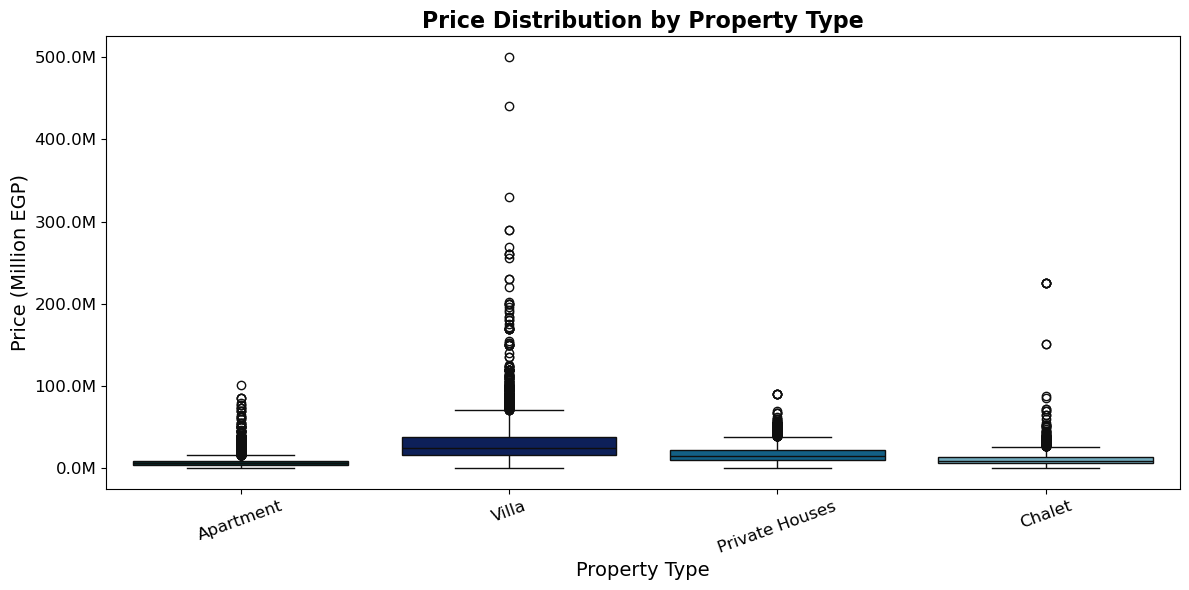

In [5]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='type', 
    y='price', 
    data=data,
    hue='type',
    palette='ocean', 
    showfliers=True
     
)

plt.title('Price Distribution by Property Type', fontsize=16, weight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Price (Million EGP)', fontsize=14)

plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# 🔹 format y-axis in millions
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M')
)

plt.tight_layout()
plt.show()

In [6]:
data.shape

(46394, 8)

#### Outlier Removal&Transformation -Price
- Extreme values in the price column were removed using quantile filtering (top 1% and bottom 1%).
- Logarithmic transformation was applied to price to reduce skewness and stabilize variance.


In [7]:
# Remove worst 2% of extreme values
upper_limit = data['price'].quantile(0.99)  # top 1%
lower_limit = data['price'].quantile(0.01)  # bottom 1%

# Apply both filters at once and make a copy
data_filtered = data.loc[
    (data['price'] <= upper_limit) &
    (data['price'] >= lower_limit)
].copy()

# Apply log-transform to the price
data_filtered['log_price'] = np.log1p(data_filtered['price'])



In [8]:
data_filtered.shape

(45477, 9)

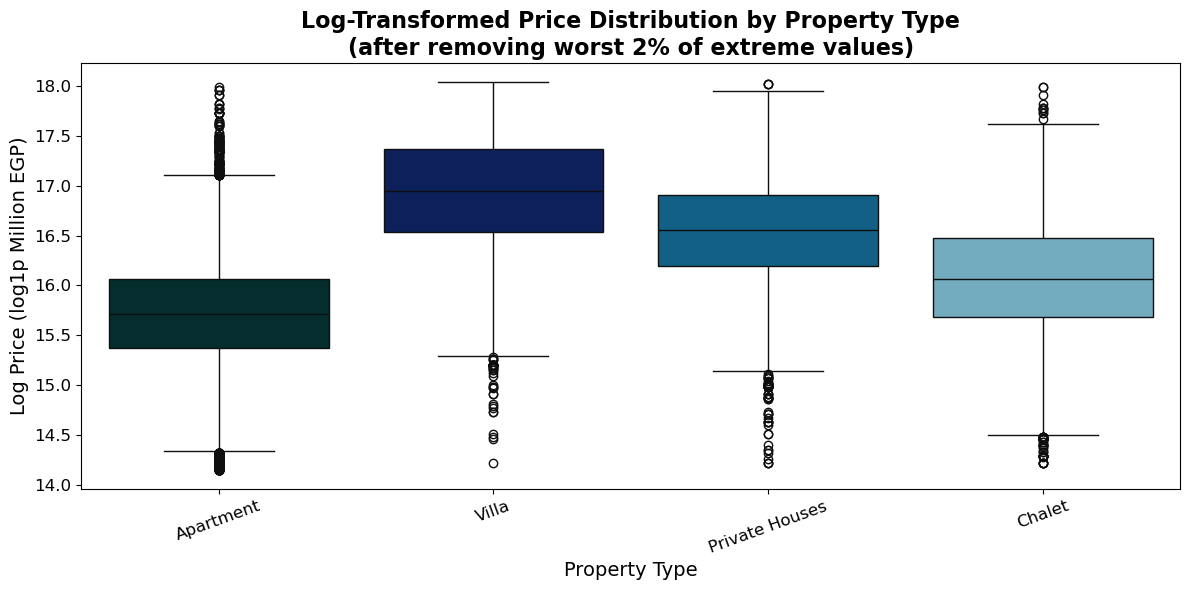

In [9]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='type', 
    y='log_price',         
    data=data_filtered, 
    palette="ocean",
    hue='type',
    showfliers=True
)

plt.title('Log-Transformed Price Distribution by Property Type\n(after removing worst 2% of extreme values)',
          fontsize=16, weight='bold')
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Log Price (log1p Million EGP)', fontsize=14)  #

plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


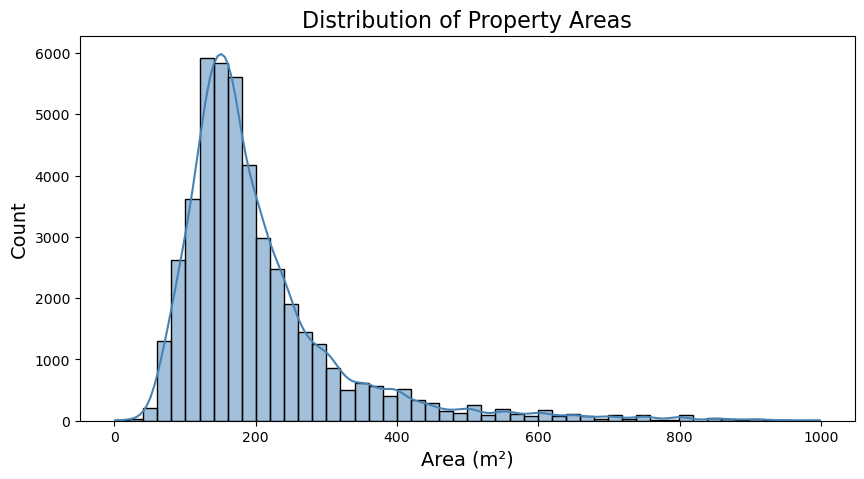

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data_filtered['area'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Property Areas', fontsize=16)
plt.xlabel('Area (m²)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


### Outlier Removal&Transformation -Area
- Extreme values in the area column were removed using quantile filtering (top 0.5% and bottom 0.5%).
- Logarithmic transformation was applied to area (and previously to price) to reduce skewness and stabilize variance.


In [11]:
# Remove worst 1% of extreme values
upper_limit = data_filtered['area'].quantile(0.995)  # top 0.5%
lower_limit = data_filtered['area'].quantile(0.005)  # bottom 0.5%

# Apply both filters at once and make a copy
data_filtered = data_filtered.loc[
    (data_filtered['area'] <= upper_limit) &
    (data_filtered['area'] >= lower_limit)
].copy()

# Apply log-transform to the price
data_filtered['log_area'] = np.log(data_filtered['area'])



In [12]:
data_filtered.shape

(45142, 10)

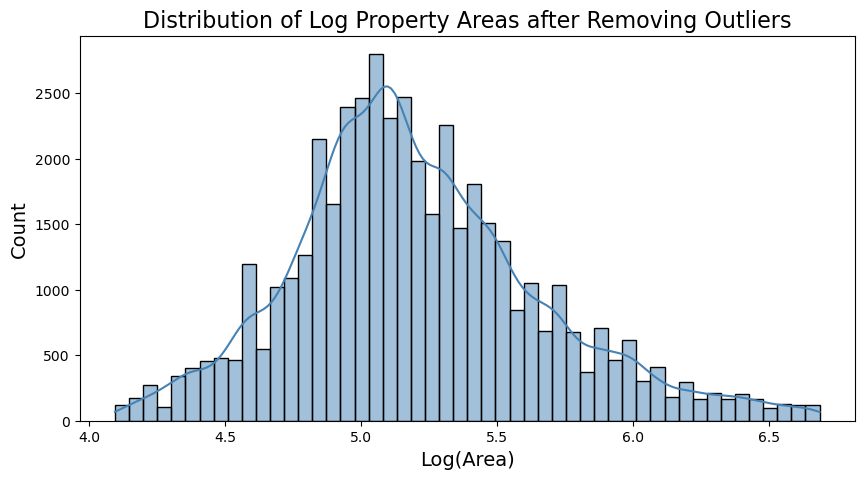

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data_filtered['log_area'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Log Property Areas after Removing Outliers', fontsize=16)
plt.xlabel('Log(Area)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


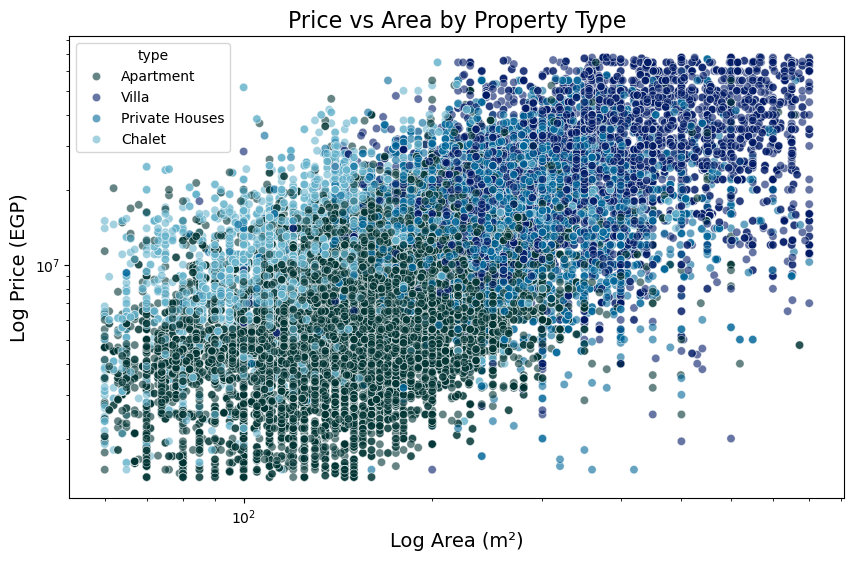

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='area', 
    y='price', 
    hue='type', 
    data=data_filtered, 
    palette="ocean", 
    alpha=0.6
)
plt.xscale('log')
plt.yscale('log')
plt.title('Price vs Area by Property Type', fontsize=16)
plt.xlabel('Log Area (m²)', fontsize=14)
plt.ylabel('Log Price (EGP)', fontsize=14)
plt.show()



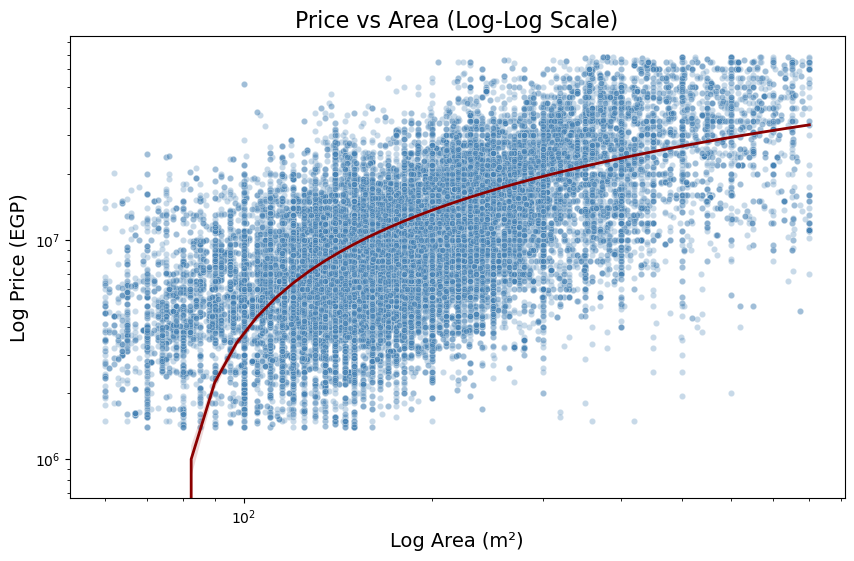

In [15]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='area', 
    y='price', 
    data=data_filtered, 
    color='steelblue', 
    alpha=0.3, 
    s=20
)

# Regression line 
sns.regplot(
    x='area', 
    y='price', 
    data=data_filtered,
    scatter=False, 
    logx=True, 
    line_kws={'color':'darkred', 'lw':2}
)

plt.xscale('log')
plt.yscale('log')
plt.title('Price vs Area (Log-Log Scale)', fontsize=16)
plt.xlabel('Log Area (m²)', fontsize=14)
plt.ylabel('Log Price (EGP)', fontsize=14)
plt.show()


In [16]:
# make order right 
data_filtered = data_filtered[[
    'id',
    'type',
    'n_bedrooms',
    'n_bathrooms',
    'area',
    'log_area',
    'sub_location',
    'location',
    'price',
    'log_price'
]]
data_filtered.head()

,id,type,n_bedrooms,n_bathrooms,area,log_area,sub_location,location,price,log_price
0,1,Apartment,3,2,140,4.941642,Other Areas,Giza,9500000,16.066802
1,2,Apartment,3,2,145,4.976734,6th of October,Giza,5800000,15.573369
2,3,Villa,3,3,225,5.416100,6th of October,Giza,15150000,16.533511
3,4,Apartment,3,2,150,5.010635,6th of October,Giza,11200000,16.231424
4,5,Villa,4,4,265,5.579730,Fifth Settlement,New Cairo,21918000,16.902819


## Correlation Analysis Results

The correlation analysis between the numerical features and both **price** and **log_price** shows the following:

- **Number of bathrooms (`n_bathrooms`)** has a stronger correlation with `log_price` (0.65) compared to raw `price` (0.62).  
- **Area (`area`)** shows the highest correlation with raw `price` (0.65), but its correlation decreases with `log_price` (0.61).  
- **Log-transformed area (`log_area`)** maintains a balanced and strong correlation with `log_price` (0.64), which indicates that the log transformation reduces skewness and aligns better with the log target.  
- **Number of bedrooms (`n_bedrooms`)** has the weakest correlation among the features (~0.51 with both price and log_price).

**Conclusion:**  
`log_price` appears to be a more stable target variable for modeling compared to raw `price`, especially since log transformations improve linear relationships and mitigate the effect of extreme values.


Correlation of numerical features with price and log_price:
                price  log_price
n_bathrooms  0.618703   0.645551
log_area     0.629352   0.635959
area         0.651182   0.607227
n_bedrooms   0.529782   0.512286


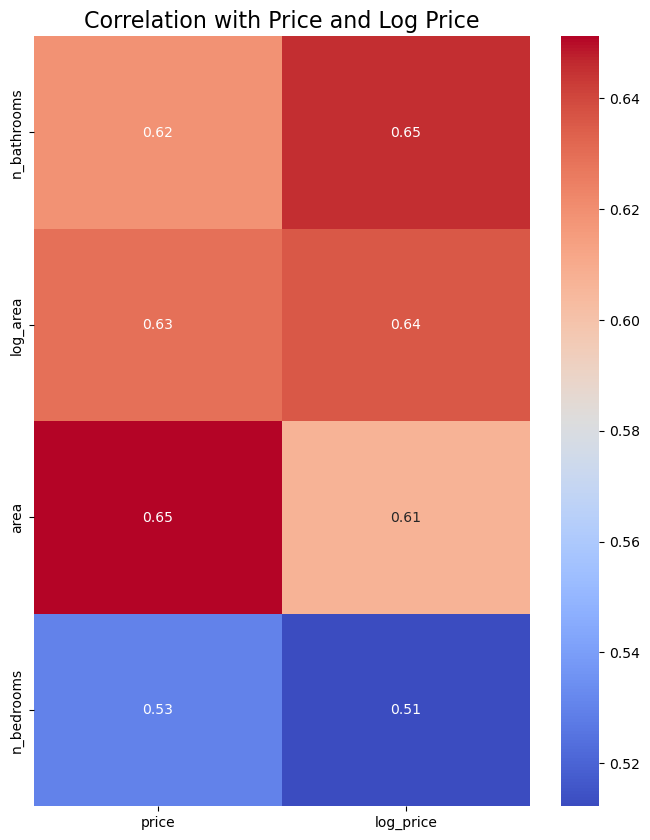

In [17]:
# Correlation of price and log_price with numerical features (excluding id, price, log_price)

# Select numeric columns
numeric_data = data_filtered.select_dtypes(include=['int64', 'float64'])

# Drop id, price, log_price from rows
corr_target = numeric_data.corr()[['price', 'log_price']].drop(index=['id','price','log_price'], errors='ignore')

# Sort by correlation with log_price
corr_target = corr_target.sort_values(by='log_price', ascending=False)

# Display as dataframe
print("Correlation of numerical features with price and log_price:")
print(corr_target)

# Plot heatmap
plt.figure(figsize=(8,10))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation with Price and Log Price", fontsize=16)
plt.show()


### boxplots by property type & location

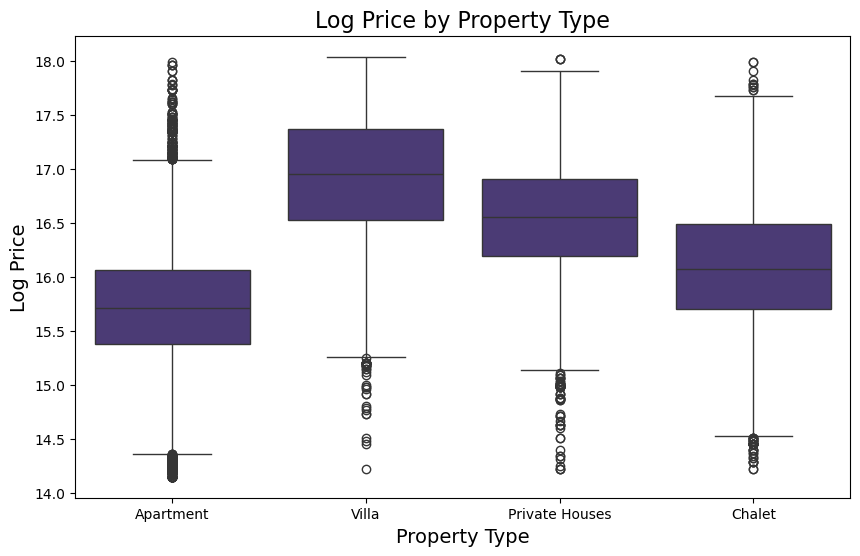

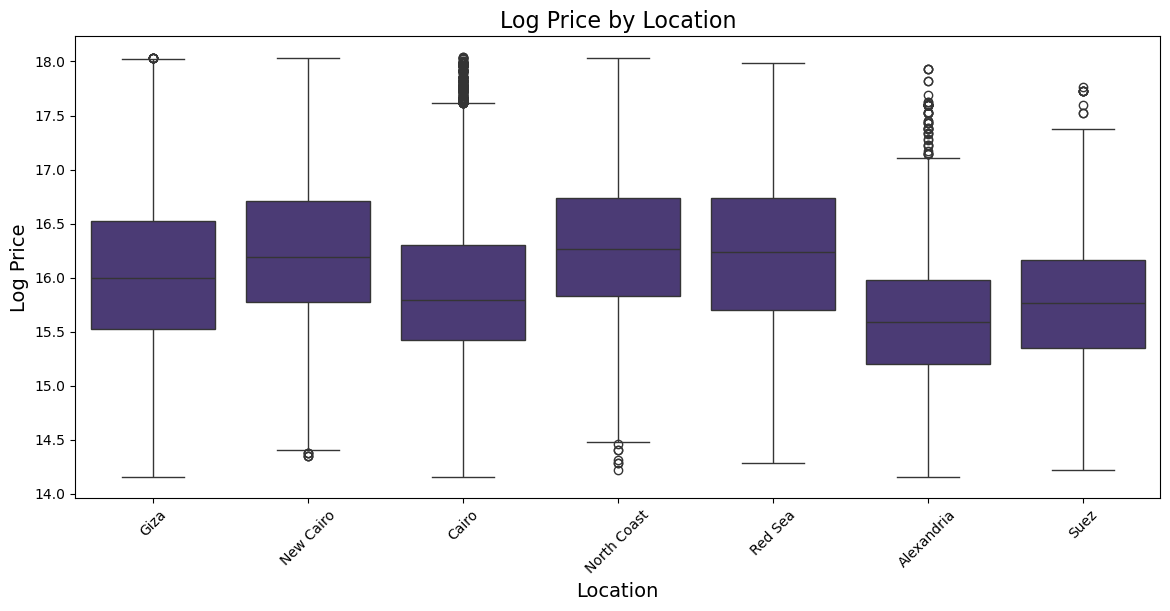

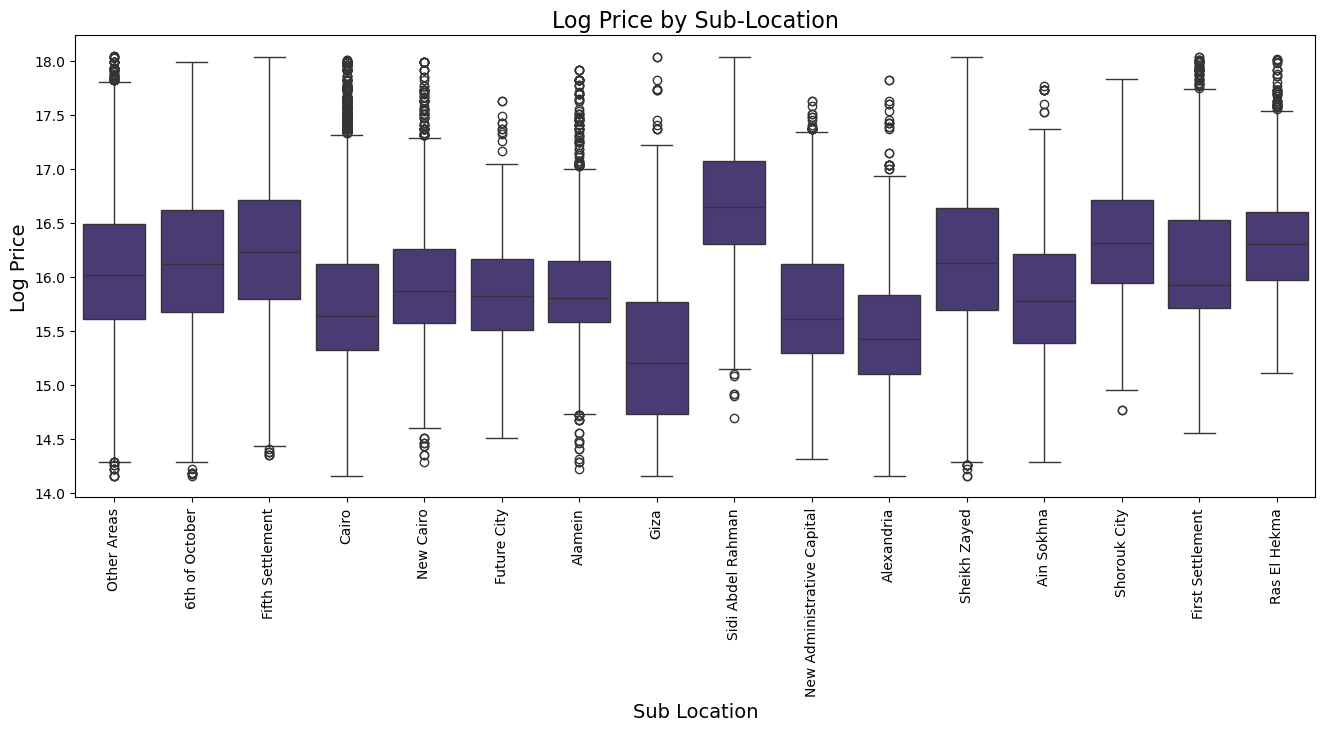

In [18]:
# Boxplots for categorical features vs log_price
sns.set_palette('viridis')
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='log_price', data=data_filtered)
plt.title("Log Price by Property Type", fontsize=16)
plt.xlabel("Property Type", fontsize=14)
plt.ylabel("Log Price", fontsize=14)
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='location', y='log_price', data=data_filtered)
plt.title("Log Price by Location", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Log Price", fontsize=14)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(16,6))
sns.boxplot(x='sub_location', y='log_price', data=data_filtered)
plt.title("Log Price by Sub-Location", fontsize=16)
plt.xlabel("Sub Location", fontsize=14)
plt.ylabel("Log Price", fontsize=14)
plt.xticks(rotation=90)
plt.show()


## Aggregated Analysis by Property Type & Location

In this section, we analyze the **average and median log prices** across property types and locations.  
This helps to understand how prices vary depending on the type of property and the geographical location.  
It also provides an indication of which features may have strong predictive power in the model.

### 🔹 Property Type
- Villas have the **highest average log price** (≈16.93), followed by Private Houses (≈16.53).
- Chalets come next (≈16.07).
- Apartments have the **lowest average log price** (≈15.72), which is expected since they dominate the dataset in count.

### 🔹 Location
- The **North Coast** (≈16.32) and **New Cairo** (≈16.26) have the highest average prices.
- Red Sea (≈16.16) and Giza (≈16.00) follow closely.
- Cairo, despite having the largest number of records, has a **lower average log price** (≈15.91).
- Suez (≈15.78) and Alexandria (≈15.61) show the lowest average prices.

### 🔹 Key Insights
- Both **property type** and **location** are strong predictors of housing prices.
- There is a clear **imbalance** in the dataset: most listings are Apartments in Cairo.
- This imbalance may cause the model to be biased toward predicting prices around these dominant categories.  
  Techniques such as **rebalancing, weighting, or careful encoding** should be considered in the modeling stage.


In [19]:
# Average log_price by property type
type_stats = data_filtered.groupby("type")["log_price"].agg(["mean", "median", "count"]).sort_values("mean", ascending=False)
print("Average log_price by Property Type:")
print(type_stats)

# Average log_price by location
location_stats = data_filtered.groupby("location")["log_price"].agg(["mean", "median", "count"]).sort_values("mean", ascending=False)
print("\nAverage log_price by Location:")
print(location_stats)


Average log_price by Property Type:
                     mean     median  count
type                                       
Villa           16.926915  16.951005   7043
Private Houses  16.536187  16.556351   6331
Chalet          16.074543  16.073412   4234
Apartment       15.721771  15.717618  27534

Average log_price by Location:
                  mean     median  count
location                                
North Coast  16.315331  16.269013   5191
New Cairo    16.255715  16.195057  12868
Red Sea      16.158702  16.233209    849
Giza         16.004329  15.998411   7746
Cairo        15.907998  15.790008  15071
Suez         15.776493  15.761421   1137
Alexandria   15.615226  15.590463   2280


## Feature Engineering and Data Export

In this section, we prepare the dataset for modeling.  
Since the machine learning model will be implemented separately in Spyder and then deployed as an API, the goal here is to finalize the feature engineering and save the processed dataset as a CSV file.

**Steps:**
1. Encode categorical variables (`type`, `location`, `sub_location`) using Target Encoding (or Frequency Encoding).
2. Ensure no missing values remain.
3. Save the final processed dataset into a CSV file for use in the modeling stage.


In [20]:
#make sure beford encoding the values that evry thing is good 
data_filtered.isna().sum()

id              0
type            0
n_bedrooms      0
n_bathrooms     0
area            0
log_area        0
sub_location    0
location        0
price           0
log_price       0
dtype: int64

In [21]:
# Calculate correlation between area and log_area
corr = data_filtered[["area", "log_area"]].corr()

print("Correlation between area and log_area:")
print(corr)

Correlation between area and log_area:
              area  log_area
area      1.000000  0.944077
log_area  0.944077  1.000000


### Data Preparation & Train/Test Split

This cell prepares the dataset for modeling by:  
1. Creating a copy of the filtered data to avoid modifying the original.  
2. Removing the `area` column since `log_area` will be used instead.  
3. Defining the target variable `y` (`log_price`) and feature matrix `X` (dropping `price`, `log_price`, and `id`).  
4. Splitting the data into training (80%) and test (20%) sets with shuffling and a fixed random state for reproducibility.



In [22]:
# -----------------------------
# 1. Load & split data
# -----------------------------
df = data_filtered.copy()

# Remove 'area', keep 'log_area'
df.drop("area", axis=1, inplace=True)

# Define target
y = df["log_price"]
X = df.drop(["price", "log_price", "id"], axis=1, errors="ignore")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

### Target Encoding 

This step prepares the categorical features using **encoding strategy**:

 **Target Encoding (Out-of-Fold)** for:
   - `location`
   - `type`
   - `sub_location`
   
   Using 6-fold cross-validation, each fold is encoded using target averages **without data leakage**.  
   This captures useful target relationships while preserving generalization.


In [23]:
# ----------------------------------------
# 1️⃣ Separate categorical features
# ----------------------------------------
cat_target = ["location","type","sub_location"]  # encode with target


# ----------------------------------------
# 2️⃣ Copy base data
# ----------------------------------------
X_train_enc = X_train.copy()
oof_encoded = pd.DataFrame(index=X_train.index, columns=cat_target)

# ----------------------------------------
# 3️⃣ Cross-validated target encoding
# ----------------------------------------
kf = KFold(n_splits=6, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train):
    encoder = TargetEncoder(cols=cat_target, smoothing=10)
    encoder.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    
    X_val_enc = encoder.transform(X_train.iloc[val_idx])
    oof_encoded.iloc[val_idx] = X_val_enc[cat_target].values

# Replace target-encoded columns
X_train_enc[cat_target] = oof_encoded

In [24]:
X_train_enc.head()


,type,n_bedrooms,n_bathrooms,log_area,sub_location,location
84,15.724519,3,3,5.298317,16.279147,16.258963
12138,15.723623,3,2,5.135798,16.273965,16.256207
2101,15.723623,3,3,5.135798,16.342638,15.902682
23037,16.927353,4,4,6.152733,16.139945,16.258745
38026,15.72204,3,1,5.010635,15.809305,15.907546


# Feature Engineering Summary

To improve the predictive performance of the house price model, several new features were engineered from the existing dataset. These derived features help the model capture more meaningful relationships between size, location, and structure of each property.

## 🔹 New Features and Their Purpose

### 1. Bathroom-to-Bedroom Ratio (`bath_to_bed`)
Represents the ratio between the number of bathrooms and bedrooms.  
This metric helps indicate the comfort level of a property — houses with a higher ratio typically suggest more luxurious or spacious layouts.

### 2. Total Number of Rooms (`total_rooms`)
Calculated as the sum of bedrooms and bathrooms.  
This captures the overall size of the property in terms of internal space and provides an intuitive measure of home capacity.

### 3. Area per Room (`area_per_room`)
Shows the average area available for each room.  
This feature measures spaciousness and helps differentiate compact homes from those with larger proportions.

### 4. Area per Bedroom (`area_per_bedroom`)
Represents how much total area is dedicated to bedrooms.  
It can indicate the level of comfort and quality of living, as well as property design efficiency.

### 5. Location–Area Interaction (`loc_area_interaction`)
An interaction feature combining the logarithm of area with the encoded location value.  
This helps the model understand how location amplifies or reduces the impact of house size on price.

### 6. Location–Sub-Location Interaction (`loc_cross`)
Captures the hierarchical relationship between a property's main location and its sub-location.  
This adds spatial depth to the model and helps identify localized pricing patterns.

### 7. Log of Total Rooms (`log_total_rooms`)
Applies a logarithmic transformation to the total number of rooms.  
This normalizes the scale of large properties, reducing the effect of extreme values and improving model stability.

---

### 🎯 Objective
These engineered features enrich the dataset by providing structural, spatial, and relational context.  
Together, they enable the regression model to learn non-linear relationships more effectively and improve overall predictive accuracy.


In [25]:
df=X_train_enc.copy()

# ✅ Ratio between bathrooms and bedrooms
df["bath_to_bed"] = df["n_bathrooms"] / (df["n_bedrooms"] + 1e-6)

# ✅ Total rooms
df["total_rooms"] = df["n_bedrooms"] + df["n_bathrooms"]

# ✅ Convert log_area back to area and derive area-based features
df["area"] = np.exp(df["log_area"])
df["area_per_room"] = df["area"] / (df["total_rooms"] + 1)
df["area_per_bedroom"] = df["area"] / (df["n_bedrooms"] + 1)

# ✅ Interaction between area and location encodings
df["loc_area_interaction"] = df["log_area"] * df["location"]

# ✅ Interaction between sub_location and location
df["loc_cross"] = df["location"] * df["sub_location"]

# ✅ log of total rooms to capture scale differences
df["log_total_rooms"] = np.log1p(df["total_rooms"])

In [26]:
df.head()

,type,n_bedrooms,n_bathrooms,log_area,sub_location,location,bath_to_bed,total_rooms,area,area_per_room,area_per_bedroom,loc_area_interaction,loc_cross,log_total_rooms
84,15.724519,3,3,5.298317,16.279147,16.258963,1.000000,6,200.0,28.571429,50.0,86.145144,264.682048,1.945910
12138,15.723623,3,2,5.135798,16.273965,16.256207,0.666666,5,170.0,28.333333,42.5,83.488601,264.552934,1.791759
2101,15.723623,3,3,5.135798,16.342638,15.902682,1.000000,6,170.0,24.285714,42.5,81.672971,259.891776,1.945910
23037,16.927353,4,4,6.152733,16.139945,16.258745,1.000000,8,470.0,52.222222,94.0,100.03571,262.415244,2.197225
38026,15.72204,3,1,5.010635,15.809305,15.907546,0.333333,4,150.0,30.000000,37.5,79.706912,251.487241,1.609438


C:\Users\ELmasry\AppData\Local\Temp\ipykernel_8792\3567080414.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


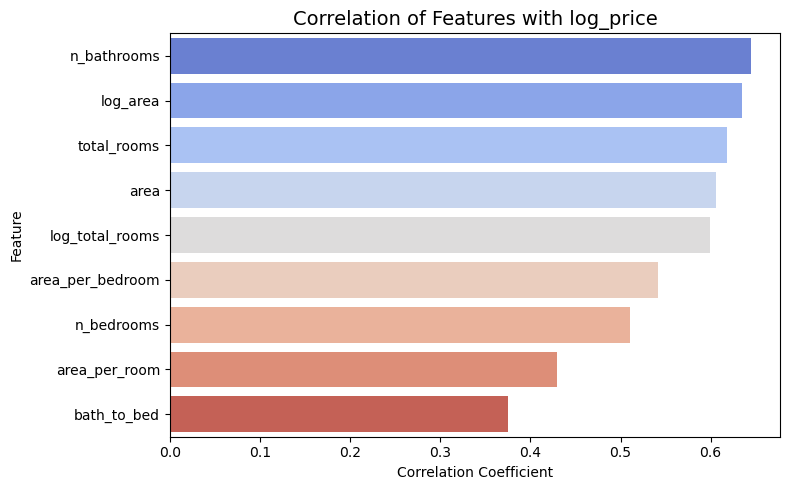

In [27]:
df["log_price"] = y_train

corr = df.corr(numeric_only=True)
target_corr = corr["log_price"].sort_values(ascending=False)

# Visualization
target_corr = target_corr.drop("log_price")

plt.figure(figsize=(8, 5))
sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    palette="coolwarm"
)
plt.title("Correlation of Features with log_price", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(False)
plt.tight_layout()
plt.show()


In [28]:
X_train_enc = df.drop("log_price",axis=1).copy()

### Final Encoding for Test Set

In this step, the same encoding strategy used for the training data is applied to the test data to ensure full consistency:

-  **Target Encoding**  
   A final target encoder is trained on the **entire training set** (`X_train`, `y_train`)  
   for the features `location` & `type` and `sub_location`, then applied to the test set.  
   Since the test data does not contain target values, fitting is done only once on the full training data to avoid data leakage.



The final output `X_test_enc` contains the test data with both encodings applied,  
fully aligned with `X_train_enc` and ready for model prediction.


In [29]:
# -----------------------------
# 3. Final encoding for test set
# -----------------------------


# ⚙️ 1️⃣ Apply target encoding using the fitted encoder
final_encoder = TargetEncoder(cols=cat_target, smoothing=10)
final_encoder.fit(X_train, y_train)
X_test_enc = X_test.copy()
X_test_enc[cat_target] = final_encoder.transform(X_test)[cat_target]




In [30]:
X_test_enc.head()

,type,n_bedrooms,n_bathrooms,log_area,sub_location,location
2186,15.721543,2,1,4.499810,15.941658,15.904573
38700,16.926032,3,5,6.086775,16.326804,15.904573
1156,16.926032,4,4,6.579251,16.202455,16.006163
32761,15.721543,3,2,4.941642,16.274044,16.255179
17821,15.721543,3,3,5.093750,16.202455,16.006163


## add same features to the test data

In [31]:
df2 = X_test_enc.copy()

# ✅ Ratio between bathrooms and bedrooms
df2["bath_to_bed"] = df2["n_bathrooms"] / (df2["n_bedrooms"] + 1e-6)

# ✅ Total rooms
df2["total_rooms"] = df2["n_bedrooms"] + df2["n_bathrooms"]

# ✅ Convert log_area back to area and derive area-based features
df2["area"] = np.exp(df2["log_area"])
df2["area_per_room"] = df2["area"] / (df2["total_rooms"] + 1)
df2["area_per_bedroom"] = df2["area"] / (df2["n_bedrooms"] + 1)

# ✅ Interaction between area and location encodings
df2["loc_area_interaction"] = df2["log_area"] * df2["location"]

# ✅ Interaction between sub_location and location
df2["loc_cross"] = df2["location"] * df2["sub_location"]

# ✅ log of total rooms to capture scale differences
df2["log_total_rooms"] = np.log1p(df2["total_rooms"])

X_test_enc = df2.copy()

In [32]:
assert all(X_test_enc.columns == X_train_enc.columns), "Mismatch in columns!" #make sure all columns are the same 
X_test_enc

,type,n_bedrooms,n_bathrooms,log_area,sub_location,location,bath_to_bed,total_rooms,area,area_per_room,area_per_bedroom,loc_area_interaction,loc_cross,log_total_rooms
2186,15.721543,2,1,4.499810,15.941658,15.904573,0.500000,3,90.0,22.500000,30.000000,71.567551,253.545270,1.386294
38700,16.926032,3,5,6.086775,16.326804,15.904573,1.666666,8,440.0,48.888889,110.000000,96.807553,259.670849,2.197225
1156,16.926032,4,4,6.579251,16.202455,16.006163,1.000000,8,720.0,80.000000,144.000000,105.308567,259.339138,2.197225
32761,15.721543,3,2,4.941642,16.274044,16.255179,0.666666,5,140.0,23.333333,35.000000,80.327284,264.537504,1.791759
17821,15.721543,3,3,5.093750,16.202455,16.006163,1.000000,6,163.0,23.285714,40.750000,81.531395,259.339138,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36107,15.721543,2,1,4.317488,15.810201,15.904573,0.500000,3,75.0,18.750000,25.000000,68.667805,251.454500,1.386294
41536,16.926032,3,3,6.214608,15.810201,15.904573,1.000000,6,500.0,71.428571,125.000000,98.840688,251.454500,1.945910
36181,16.074938,3,2,4.828314,16.680653,16.322392,0.666666,5,125.0,20.833333,31.250000,78.809630,272.268153,1.791759
5361,15.721543,3,2,4.969813,15.810201,15.904573,0.666666,5,144.0,24.000000,36.000000,79.042759,251.454500,1.791759


### Save Encoded Data to CSV

This cell prepares and saves the processed training and test sets:

In [33]:
# -----------------------------
# 4. Save to CSV
# -----------------------------
train_ready = X_train_enc.copy()
train_ready["log_price"] = y_train

test_ready = X_test_enc.copy()
test_ready["log_price"] = y_test

train_ready.to_csv("d:\\train_encoded.csv", index=False)
test_ready.to_csv("d:\\test_encoded.csv", index=False)

print("Train and Test encoded files are saved: train_encoded.csv, test_encoded.csv")

Train and Test encoded files are saved: train_encoded.csv, test_encoded.csv


# Features Summary  

| **Feature Name**        | **Type**                  | **Source**        | **Description**                                                                 | **Purpose / Insight**                                                                 |
|--------------------------|---------------------------|-------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| `type`                  | Encoded (Target)          | 🟢 Original        | Target-encoded representation of the property type. | Captures architectural and functional differences between property types. |
| `n_bedrooms`            | Numeric                   | 🟢 Original        | Number of bedrooms in the property. | Direct measure of property size; strongly influences price. |
| `n_bathrooms`           | Numeric                   | 🟢 Original        | Number of bathrooms in the property. | Indicates comfort level and modern facilities. |
| `log_area`              | Numeric (log-transformed)  | 🟢 Original (Transformed) | Logarithm of total built-up area. | Stabilizes skewed data; models proportional area effects. |
| `location`              | Encoded (Target)          | 🟢 Original        | Target-encoded main city or district. | Captures macro-level price variation due to geography. |
| `sub_location`          | Encoded (Target)          | 🟢 Original        | Target-encoded sub-region or neighborhood. | Adds micro-level geographical differentiation. |
| `bath_to_bed`           | Numeric (Derived)         | 🔵 Engineered      | Bathrooms-to-bedrooms ratio. | Reflects property luxury and comfort balance. |
| `total_rooms`           | Numeric (Derived)         | 🔵 Engineered      | Total count of rooms (bed + bath). | Simple proxy for overall property size. |
| `log_total_rooms`       | Numeric (Transformed)     | 🔵 Engineered      | Logarithm of total room count. | Reduces impact of large room counts on model stability. |
| `area`                  | Numeric (Derived)         | 🔵 Engineered      | Actual property area (exponentiated from `log_area`). | Represents physical space and scale. |
| `area_per_room`         | Numeric (Derived)         | 🔵 Engineered      | Average area per room. | Indicates spaciousness and internal density. |
| `area_per_bedroom`      | Numeric (Derived)         | 🔵 Engineered      | Area divided by number of bedrooms. | Captures the space dedicated to private use. |
| `loc_area_interaction`  | Numeric (Interaction)     | 🔵 Engineered      | Interaction between `log_area` and `location`. | Models how the impact of area differs by location. |
| `loc_cross`             | Numeric (Interaction)     | 🔵 Engineered      | Product of `sub_location` and `location`. | Captures cross-geographic effects within regions. |
| `log_price`             | Numeric (Target Variable) | 🟢 Original (Target) | Logarithm of property price. | Target variable; improves learning on wide price ranges. |

---

### 🧩 Legend
- 🟢 **Original:** Feature existed in the original dataset (raw or transformed).  
- 🔵 **Engineered:** Feature created during feature engineering (derived or interaction).  
- 🟢 **Original (Transformed):** Original variable after applying transformations or encodings.

---

### 💡 Notes
- **Categorical Encoding:**  
  - `type`, `location`, `sub_location` → Target Encoding (cross-validated, smoothed)  
- **Transformations:**  
  - Logarithmic transforms stabilize right-skewed variables.  
- **Feature Interactions:**  
  - `loc_area_interaction` and `loc_cross` enhance spatial interpretability.  
- **Goal:**  
  - Provide the model with compact, numerically meaningful, and interpretable features reflecting both property characteristics and geography.


---

## 👤 Author

**Name:** Mohamed waleed EL-masry  
**e-mail** mwezzat16@gmail.com  
**Year:** 2025  

---
